In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/AB/Desktop/IMDB.csv")
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [3]:
df = df.rename(columns={"Runtime (Minutes)":"Runtime", "Revenue (Millions)":"Revenue"})
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


# Exploratory Data Analysis

### Checking for missing values

In [4]:
df.isnull().sum()

Rank             0
Title            0
Genre            0
Description      0
Director         0
Actors           0
Year             0
Runtime          0
Rating           0
Votes            0
Revenue        128
Metascore       64
dtype: int64

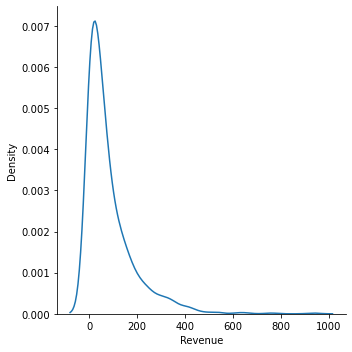

In [5]:
sns.displot(df, x="Revenue", kind="kde")

In [6]:
#Replaced the missing values with "Median" as the data is positively skewed. 

revenue_median = df["Revenue"].median()
df['Revenue'].fillna(revenue_median, inplace = True)

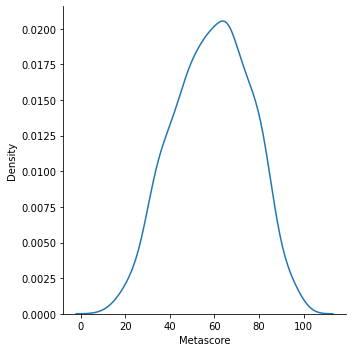

In [7]:
sns.displot(df, x="Metascore", kind="kde")

In [8]:
#Replaced the missing values with "Mean" as the data is normally distributed. 

metascore_mean = round(df['Metascore'].mean())
df["Metascore"].fillna(metascore_mean, inplace=True)

### Correlation between features

Most of the features seems to be weakly correlated except Metascore and Ratings column. Although, few columns are related moderately, it is not necessarily alarming. From the below table, I have concluded not to drop any columns.

In [9]:
df.corr()

,Rank,Year,Runtime,Rating,Votes,Revenue,Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.259607,-0.185153
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.146589,-0.076074
Runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.272955,0.202235
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.218448,0.604717
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.638758,0.318092
Revenue,-0.259607,-0.146589,0.272955,0.218448,0.638758,1.000000,0.142039
Metascore,-0.185153,-0.076074,0.202235,0.604717,0.318092,0.142039,1.000000


### What's the trend of movie production YoY?

From the histogram below, it can be observed that there was a steady but limited growth in movie production between 2006 - 2015. However, there was a drastic increase in movie production in 2016. 

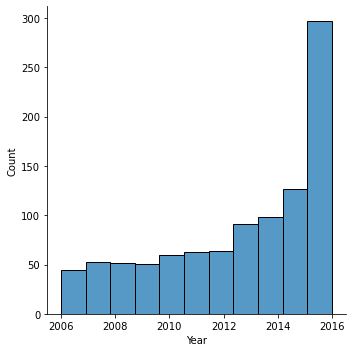

In [10]:
sns.displot(data = df, x="Year")

### Does runtime has any kind of impact on rating? For example, is the rating low for movies with very high runtimes? 

The below relational plot suggests that there is no concrete evidence that runtime has any kid of impact on rating provided by users. The ratings are tightly densed around 80-160 mins runtime, with few outliers around 70 mins and above 180 mins. For the purpose of this project, these points are considered as random as there is no sufficient data to suggest otherwise. 

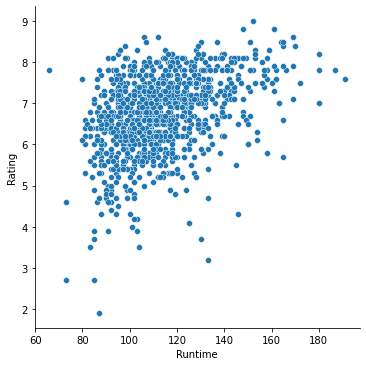

In [11]:
sns.relplot(data=df, x="Runtime", y="Rating")

### Directors with movies of rating 8 and above 

In [12]:
dir_temp = df[df['Rating']>=8]
dir_temp = dir_temp.iloc[:,[1, 4]]
dir_temp

,Title,Director
0,Guardians of the Galaxy,James Gunn
6,La La Land,Damien Chazelle
16,Hacksaw Ridge,Mel Gibson
18,Lion,Garth Davis
19,Arrival,Denis Villeneuve
...,...,...
742,El secreto de sus ojos,Juan José Campanella
765,PK,Rajkumar Hirani
772,How to Train Your Dragon,Dean DeBlois
861,Koe no katachi,Naoko Yamada


### Director with highest number of ratings above 8

The highest 8 or above ratings are 5, received by director Christopher Nolan. Followed by Denis Villeneuve and Martin Scorsese with 3 each. In the available data, it can be inferred that Christopher Nolan is the best director between years 2006-2016. 

<AxesSubplot:xlabel='index'>

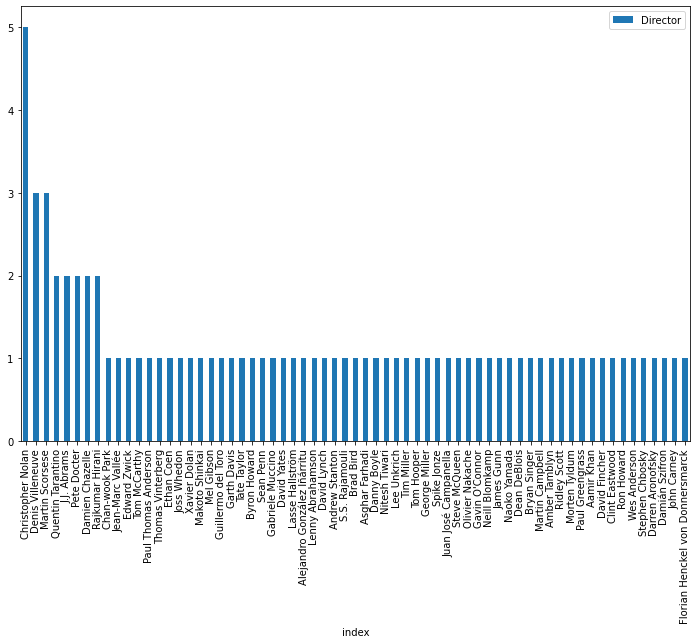

In [13]:
dir_rat_count = pd.DataFrame(dir_temp['Director'].value_counts()).reset_index()

dir_rat_count.plot(x="index", y="Director", kind="bar", figsize=(12,8))

### Rating vs Revenue? Are movies with high revenue generating high rating? Or vice-versa..

There doesn't seem to be a trend between rating and revenue. Which can be loosely translated that a good movie doesn't necessarily generate high revenue.

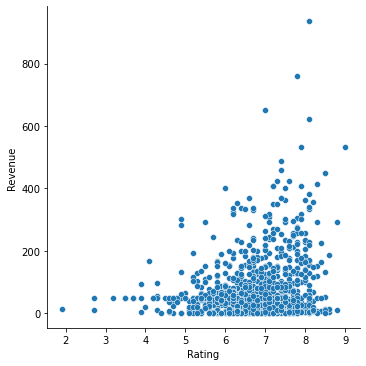

In [14]:
sns.relplot(x="Rating", y="Revenue", data=df)

### Which year were the audience more involved in movies and rating?

From the below category plot, the data suggests that there is no significant change in audience involvement over the years, apart from few outliers in years 2008 and 2010. In other words, audience have always been actively involved in movies and rating them accordingly. 

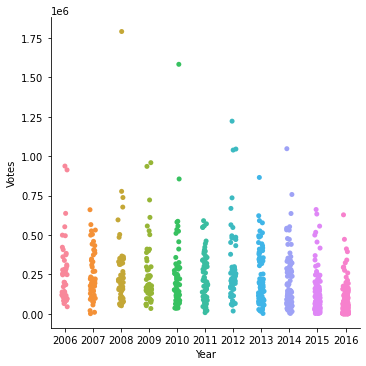

In [15]:
sns.catplot(data=df, x="Year", y="Votes")

### Study what caused the outliers in number of votes in the years 2008 and 2010

The outliers in number of votes can be attributed to the movies "The Dark Knight" and "Inception" which happened to garner high revenue and rating. This led to more number of people watching the movie and vote. It is interesting to note that while other titles reveived votes in 6 digits, these two movies stood out and received votes in 7 digits.

In [16]:
#Creating a new dataframe with data only for 2008 and the one with max votes (outlier)
vote_2008 = df.loc[(df['Year'] == 2008) & (df['Votes'] == df['Votes'].max()), 
                   ['Title', 'Year', 'Rating', 'Votes', 'Revenue']]

#Creating a new dataframe with data only for 2010 and the one with max votes (outlier)
vote_2010 = df.loc[(df['Year'] == 2010),['Title', 'Year', 'Rating', 'Votes', 'Revenue']]

#Determining the data row with max votes 
max_2010 = vote_2010['Votes'].max()

#Passing the max condition to filter out the row which has outlier
vote_2010 = vote_2010.loc[(vote_2010['Votes'] == max_2010), ['Title', 'Year', 'Rating', 'Votes', 'Revenue']]

#Concatinating both dataframes to plot them
vote_combined = pd.concat([vote_2008, vote_2010])
vote_combined

,Title,Year,Rating,Votes,Revenue
54,The Dark Knight,2008,9.0,1791916,533.32
80,Inception,2010,8.8,1583625,292.57


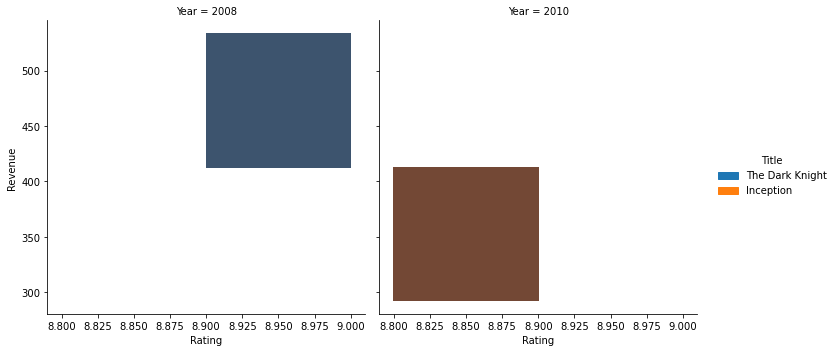

In [17]:
sns.displot(data=vote_combined, x="Rating", y="Revenue", hue="Title", col='Year')